
# Evaluation Metrics

Choosing the best model

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('df_concat.csv')

In [4]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,Unnamed: 0
0,0.6110,0.3660,4,-10.890,0,0.2910,0.874,0.000515,0.0838,0.5930,146.052,audio_features,1ygVkGM0Uk0M7ULenlZGaf,spotify:track:1ygVkGM0Uk0M7ULenlZGaf,https://api.spotify.com/v1/tracks/1ygVkGM0Uk0M...,https://api.spotify.com/v1/audio-analysis/1ygV...,158173,4,NaN
1,0.5120,0.5110,2,-8.645,0,0.0300,0.662,0.000199,0.2090,0.5890,89.499,audio_features,6U03Orwr5Dxt8jahLnQpYV,spotify:track:6U03Orwr5Dxt8jahLnQpYV,https://api.spotify.com/v1/tracks/6U03Orwr5Dxt...,https://api.spotify.com/v1/audio-analysis/6U03...,179293,4,NaN
2,0.7970,0.3550,11,-14.592,0,0.0651,0.872,0.000057,0.0857,0.9610,87.574,audio_features,2MzS7IK7ZXuk48Btb3EDMy,spotify:track:2MzS7IK7ZXuk48Btb3EDMy,https://api.spotify.com/v1/tracks/2MzS7IK7ZXuk...,https://api.spotify.com/v1/audio-analysis/2MzS...,118805,4,NaN
3,0.4260,0.2310,2,-16.066,1,0.0359,0.740,0.000000,0.1720,0.6670,177.980,audio_features,4pSSmEzKzGo6ehVriMb77D,spotify:track:4pSSmEzKzGo6ehVriMb77D,https://api.spotify.com/v1/tracks/4pSSmEzKzGo6...,https://api.spotify.com/v1/audio-analysis/4pSS...,122044,4,NaN
4,0.5080,0.2790,6,-15.586,0,0.0384,0.783,0.000000,0.1400,0.7280,83.261,audio_features,3LhM43JzrSMUgTzs7wfn0u,spotify:track:3LhM43JzrSMUgTzs7wfn0u,https://api.spotify.com/v1/tracks/3LhM43JzrSMU...,https://api.spotify.com/v1/audio-analysis/3LhM...,116611,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,0.2400,0.0834,6,-29.545,0,0.0499,0.978,0.944000,0.0804,0.1880,169.621,audio_features,4VVEfBXep7FdOt524jkfLF,spotify:track:4VVEfBXep7FdOt524jkfLF,https://api.spotify.com/v1/tracks/4VVEfBXep7Fd...,https://api.spotify.com/v1/audio-analysis/4VVE...,159320,4,NaN
2686,0.4050,0.3180,9,-17.140,1,0.0565,0.938,0.723000,0.2840,0.3420,151.434,audio_features,7hOLwSaTSkrqxSMzj4bXI1,spotify:track:7hOLwSaTSkrqxSMzj4bXI1,https://api.spotify.com/v1/tracks/7hOLwSaTSkrq...,https://api.spotify.com/v1/audio-analysis/7hOL...,424653,4,NaN
2687,0.2910,0.0981,8,-23.156,1,0.0398,0.950,0.865000,0.2750,0.1940,138.168,audio_features,76i4IBw3KsuDw783tvHB0e,spotify:track:76i4IBw3KsuDw783tvHB0e,https://api.spotify.com/v1/tracks/76i4IBw3KsuD...,https://api.spotify.com/v1/audio-analysis/76i4...,249640,4,NaN
2688,0.0992,0.2260,9,-14.840,0,0.0339,0.937,0.903000,0.1830,0.0605,79.518,audio_features,53ann6bENp7BF8uklrzQAp,spotify:track:53ann6bENp7BF8uklrzQAp,https://api.spotify.com/v1/tracks/53ann6bENp7B...,https://api.spotify.com/v1/audio-analysis/53an...,256493,4,NaN


In [5]:
df["mode"].unique()

array([0, 1])

In [6]:
df["time_signature"].unique()

array([4, 3, 1, 5, 0])

In [7]:
df_af = df.drop(axis=1, columns=["mode", "type", "uri", "track_href", "analysis_url", "duration_ms", "Unnamed: 0"], inplace=False, errors='raise')
df_af

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,time_signature
0,0.6110,0.3660,4,-10.890,0.2910,0.874,0.000515,0.0838,0.5930,146.052,1ygVkGM0Uk0M7ULenlZGaf,4
1,0.5120,0.5110,2,-8.645,0.0300,0.662,0.000199,0.2090,0.5890,89.499,6U03Orwr5Dxt8jahLnQpYV,4
2,0.7970,0.3550,11,-14.592,0.0651,0.872,0.000057,0.0857,0.9610,87.574,2MzS7IK7ZXuk48Btb3EDMy,4
3,0.4260,0.2310,2,-16.066,0.0359,0.740,0.000000,0.1720,0.6670,177.980,4pSSmEzKzGo6ehVriMb77D,4
4,0.5080,0.2790,6,-15.586,0.0384,0.783,0.000000,0.1400,0.7280,83.261,3LhM43JzrSMUgTzs7wfn0u,4
...,...,...,...,...,...,...,...,...,...,...,...,...
2685,0.2400,0.0834,6,-29.545,0.0499,0.978,0.944000,0.0804,0.1880,169.621,4VVEfBXep7FdOt524jkfLF,4
2686,0.4050,0.3180,9,-17.140,0.0565,0.938,0.723000,0.2840,0.3420,151.434,7hOLwSaTSkrqxSMzj4bXI1,4
2687,0.2910,0.0981,8,-23.156,0.0398,0.950,0.865000,0.2750,0.1940,138.168,76i4IBw3KsuDw783tvHB0e,4
2688,0.0992,0.2260,9,-14.840,0.0339,0.937,0.903000,0.1830,0.0605,79.518,53ann6bENp7BF8uklrzQAp,4


In [8]:
df_af.to_csv('df_af.csv', index=False)

In [9]:
X = df_af.drop(axis=1, columns=["id"], inplace=False, errors='raise')
X

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.6110,0.3660,4,-10.890,0.2910,0.874,0.000515,0.0838,0.5930,146.052,4
1,0.5120,0.5110,2,-8.645,0.0300,0.662,0.000199,0.2090,0.5890,89.499,4
2,0.7970,0.3550,11,-14.592,0.0651,0.872,0.000057,0.0857,0.9610,87.574,4
3,0.4260,0.2310,2,-16.066,0.0359,0.740,0.000000,0.1720,0.6670,177.980,4
4,0.5080,0.2790,6,-15.586,0.0384,0.783,0.000000,0.1400,0.7280,83.261,4
...,...,...,...,...,...,...,...,...,...,...,...
2685,0.2400,0.0834,6,-29.545,0.0499,0.978,0.944000,0.0804,0.1880,169.621,4
2686,0.4050,0.3180,9,-17.140,0.0565,0.938,0.723000,0.2840,0.3420,151.434,4
2687,0.2910,0.0981,8,-23.156,0.0398,0.950,0.865000,0.2750,0.1940,138.168,4
2688,0.0992,0.2260,9,-14.840,0.0339,0.937,0.903000,0.1830,0.0605,79.518,4


In [10]:
#Standardize the numerical features

std = StandardScaler()

X_scaled = std.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [11]:
std

StandardScaler()

In [12]:
X_scaled.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.034147,-1.087831,-0.333869,-0.469811,2.509800,1.784941,-0.402018,-0.656325,0.205743,0.855466,0.198716
1,-0.518101,-0.495848,-0.889974,-0.061501,-0.655962,1.115717,-0.403269,0.193065,0.190012,-1.089441,0.198716
2,1.071703,-1.132740,1.612497,-1.143113,-0.230221,1.778627,-0.403831,-0.643435,1.652987,-1.155643,0.198716
3,-0.997832,-1.638988,-0.889974,-1.411197,-0.584399,1.361941,-0.404057,-0.057953,0.496765,1.953498,0.198716
4,-0.540414,-1.443021,0.222235,-1.323897,-0.554075,1.497679,-0.404057,-0.275049,0.736661,-1.303971,0.198716


In [13]:
# Save the scaler as a pickle file:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(std, file)

In [14]:
# Load the scaler from the pickle file
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)

In [15]:
scaler

StandardScaler()

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import cluster
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
import pickle

## K-Means

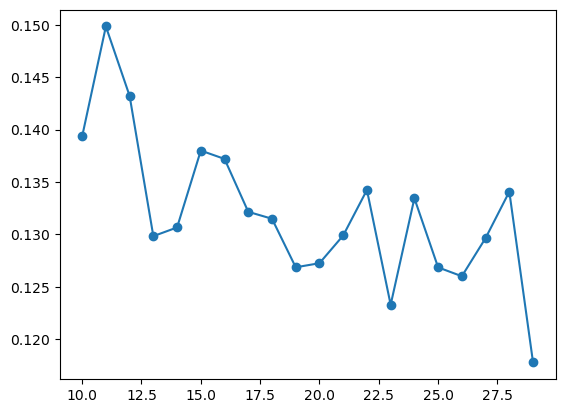

In [17]:
#K-Means
silhouette = []

for k in range(10,30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X_scaled)
    labels = kmeans.predict(X_scaled)
    silhouette.append(silhouette_score(X_scaled, labels))

import matplotlib.pyplot as plt

plt.plot(range(10,30), silhouette, marker = "o")

In [18]:
kmeans = KMeans(n_clusters = 10, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=10, random_state=0)

In [19]:
labels_km = kmeans.fit_predict(X_scaled)

### Silhouette Score

In [20]:
sil_score_kmeans = silhouette_score(X_scaled, labels_km)
print(f"Silhouette Score for KMeans: {sil_score_kmeans}")

Silhouette Score for KMeans: 0.13820690255033055


### Davies-Bouldin Index

In [21]:
db_score_km = davies_bouldin_score(X_scaled, labels_km)
print(f"Davies-Bouldin Index: {db_score_km}")

Davies-Bouldin Index: 1.643964346840929


### Calinski-Harabasz Index

In [22]:
ch_score_km = calinski_harabasz_score(X_scaled, labels_km)
print(f"Calinski-Harabasz Index: {ch_score_km}")

Calinski-Harabasz Index: 344.48717982106683


## Hierarchical

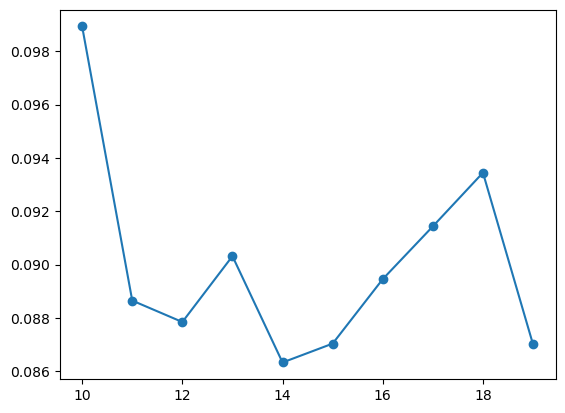

In [23]:
#Hierarchical

silhouette = []

for k in range(10,20):
    agglomerative = cluster.AgglomerativeClustering(n_clusters=k,linkage='ward')
    agglomerative.fit(X_scaled)
    labels = agglomerative.fit_predict(X_scaled)
    silhouette.append(silhouette_score(X_scaled, labels))

import matplotlib.pyplot as plt

plt.plot(range(10,20), silhouette, marker = "o")

In [24]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=11,linkage='ward')
labels_ward = agglomerative.fit_predict(X_scaled)

### Silhouette Score

In [25]:
sil_score_agg_ward = silhouette_score(X_scaled, labels_ward)
print(f"Silhouette Score for Agglomerative Ward: {sil_score_agg_ward}")

Silhouette Score for Agglomerative Ward: 0.08865033814376774


### Davies-Bouldin Index

In [26]:
db_score_ward = davies_bouldin_score(X_scaled, labels_ward)
print(f"Davies-Bouldin Index: {db_score_ward}")

Davies-Bouldin Index: 1.6852297017464564


### Calinski-Harabasz Index

In [27]:
ch_score_ward = calinski_harabasz_score(X_scaled, labels_ward)
print(f"Calinski-Harabasz Index: {ch_score_ward}")

Calinski-Harabasz Index: 293.19817857252866


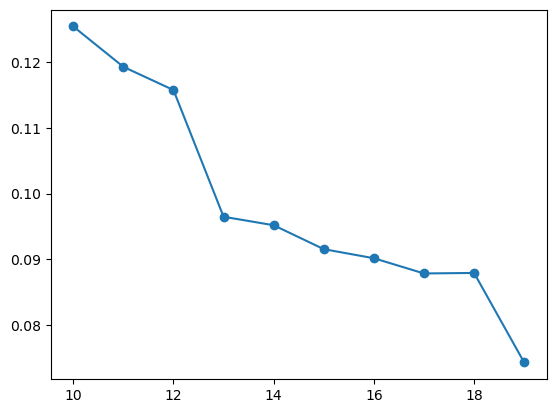

In [28]:
silhouette = []

for k in range(10,20):
    agglomerative = cluster.AgglomerativeClustering(n_clusters=k,linkage='complete')
    agglomerative.fit(X_scaled)
    labels = agglomerative.fit_predict(X_scaled)
    silhouette.append(silhouette_score(X_scaled, labels))

import matplotlib.pyplot as plt

plt.plot(range(10,20), silhouette, marker = "o")

### Silhouette Score

In [29]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=13,linkage='complete')
labels_compl = agglomerative.fit_predict(X_scaled)
sil_score_agg_compl = silhouette_score(X_scaled, labels)
print(f"Silhouette Score for Agglomerative Complete: {sil_score_agg_compl}")

Silhouette Score for Agglomerative Complete: 0.074265157192736


### Davies-Bouldin Index

In [30]:
db_score_agg_compl = davies_bouldin_score(X_scaled, labels_compl)
print(f"Davies-Bouldin Index: {db_score_agg_compl}")

Davies-Bouldin Index: 1.7213275395405365


### Calinski-Harabasz Index

In [31]:
ch_score_compl = calinski_harabasz_score(X_scaled, labels_compl)
print(f"Calinski-Harabasz Index: {ch_score_compl}")

Calinski-Harabasz Index: 200.33343437243025


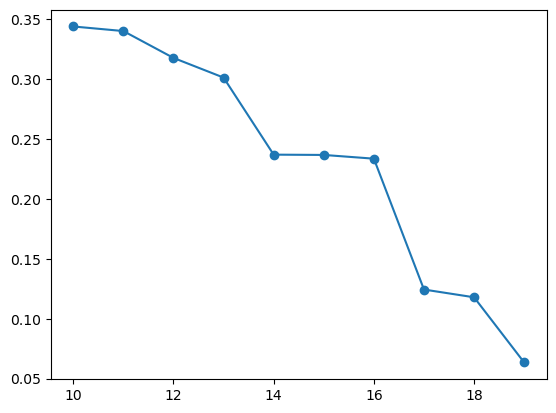

In [32]:
silhouette = []

for k in range(10,20):
    agglomerative = cluster.AgglomerativeClustering(n_clusters=k,linkage='single')
    agglomerative.fit(X_scaled)
    labels = agglomerative.fit_predict(X_scaled)
    silhouette.append(silhouette_score(X_scaled, labels))

import matplotlib.pyplot as plt

plt.plot(range(10,20), silhouette, marker = "o")

### Silhouette Score

In [33]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=10,linkage='single')
labels_single = agglomerative.fit_predict(X_scaled)
sil_score_agg_single = silhouette_score(X_scaled, labels)
print(f"Silhouette Score for Agglomerative Single: {sil_score_agg_single}")

Silhouette Score for Agglomerative Single: 0.06343413983399793


### Davies-Bouldin Index

In [34]:
db_score_agg_single = davies_bouldin_score(X_scaled, labels_single)
print(f"Davies-Bouldin Index: {db_score_agg_single}")

Davies-Bouldin Index: 0.523993873304133


### Calinski-Harabasz Index

In [35]:
ch_score_single = calinski_harabasz_score(X_scaled, labels_single)
print(f"Calinski-Harabasz Index: {ch_score_single}")

Calinski-Harabasz Index: 18.18656908524676


## DBSCAN

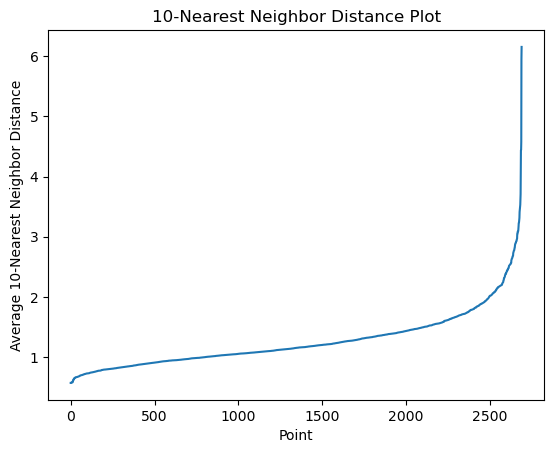

In [36]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

#find best eps:
# Compute the k-nearest neighbors for each point
k = 10  # Number of neighbors to consider
nbrs = NearestNeighbors(n_neighbors=k).fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)
 
# Compute the average distance of the k-th nearest neighbor for each point
avg_distances = distances.mean(axis=1)
 
# Visualize the plot of k-nearest neighbors distance
plt.plot(sorted(avg_distances))
plt.xlabel('Point')
plt.ylabel(f'Average {k}-Nearest Neighbor Distance')
plt.title(f'{k}-Nearest Neighbor Distance Plot')
plt.show()

### Silhouette Score

In [37]:
#Find the best min_samples

from sklearn.metrics import silhouette_score
import numpy as np
 
# Optimal value for eps
eps = 2.3
 
# Range of values for min_samples to explore
min_samples_range = range(2, 10)

# Initialize a list to save silhouette scores
silhouette_scores = []
 
# Compute silhouette score for each min_samples value
for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X_scaled)
    if len(np.unique(labels)) > 1:  # Ensure there are at least 2 clusters
        silhouette_avg = silhouette_score(X_scaled, labels)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(-1)  # Set a negative score if there's only one cluster
 
# Find the min_samples value with the maximum silhouette score
best_min_samples = min_samples_range[np.argmax(silhouette_scores)]
best_silhouette_score = max(silhouette_scores)
 
print(f"The best value for min_samples is {best_min_samples} with a silhouette score of {best_silhouette_score}")

The best value for min_samples is 4 with a silhouette score of 0.21785440788967986


In [38]:
dbs = cluster.DBSCAN(eps=2.3, min_samples = 6)

pred = dbs.fit_predict(X_scaled)
pred

array([0, 0, 0, ..., 0, 0, 1])

In [39]:
pred= pd.DataFrame(pred)

In [40]:
pred.value_counts()

 0    2448
-1     105
 1      95
 2      42
Name: count, dtype: int64

### Davies-Bouldin Index

In [41]:
db_score_dbs = davies_bouldin_score(X_scaled, pred)
print(f"Davies-Bouldin Index: {db_score_dbs}")

Davies-Bouldin Index: 2.650610622039243


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Calinski-Harabasz Index

In [42]:
ch_score_dbs = calinski_harabasz_score(X_scaled, pred)
print(f"Calinski-Harabasz Index: {ch_score_dbs}")

Calinski-Harabasz Index: 113.78448210937745


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## K-Means saving different models

In [43]:
kmeans_10 = KMeans(n_clusters = 10, random_state=0)
kmeans_10.fit(X_scaled)

KMeans(n_clusters=10, random_state=0)

In [44]:
# Save the model as a pickle file:
with open('kmeans_10.pkl', 'wb') as file:
    pickle.dump(kmeans_10, file)

In [45]:
kmeans_16 = KMeans(n_clusters = 16, random_state=0)
kmeans_16.fit(X_scaled)

KMeans(n_clusters=16, random_state=0)

In [46]:
with open('kmeans_16.pkl', 'wb') as file:
    pickle.dump(kmeans_16, file)

In [47]:
kmeans_18 = KMeans(n_clusters = 18, random_state=0)
kmeans_18.fit(X_scaled)

KMeans(n_clusters=18, random_state=0)

In [48]:
with open('kmeans_18.pkl', 'wb') as file:
    pickle.dump(kmeans_18, file)

In [49]:
kmeans_32 = KMeans(n_clusters = 32, random_state=0)
kmeans_32.fit(X_scaled)

KMeans(n_clusters=32, random_state=0)

In [50]:
with open('kmeans_32.pkl', 'wb') as file:
    pickle.dump(kmeans_32, file)

In [51]:
kmeans_11 = KMeans(n_clusters = 11, random_state=0)
kmeans_11.fit(X_scaled)

KMeans(n_clusters=11, random_state=0)

In [52]:
with open('kmeans_11.pkl', 'wb') as file:
    pickle.dump(kmeans_11, file)

In [53]:
kmeans_37 = KMeans(n_clusters = 37, random_state=0)
kmeans_37.fit(X_scaled)

KMeans(n_clusters=37, random_state=0)

In [54]:
with open('kmeans_37.pkl', 'wb') as file:
    pickle.dump(kmeans_37, file)

## K-Means Testing

In [55]:
pred = kmeans.predict(X_scaled)
pred = pd.DataFrame(pred)
pred

,0
0,1
1,3
2,3
3,3
4,3
...,...
2685,5
2686,4
2687,5
2688,5


In [56]:
X["cluster"] = pred
X

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,cluster
0,0.6110,0.3660,4,-10.890,0.2910,0.874,0.000515,0.0838,0.5930,146.052,4,1
1,0.5120,0.5110,2,-8.645,0.0300,0.662,0.000199,0.2090,0.5890,89.499,4,3
2,0.7970,0.3550,11,-14.592,0.0651,0.872,0.000057,0.0857,0.9610,87.574,4,3
3,0.4260,0.2310,2,-16.066,0.0359,0.740,0.000000,0.1720,0.6670,177.980,4,3
4,0.5080,0.2790,6,-15.586,0.0384,0.783,0.000000,0.1400,0.7280,83.261,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
2685,0.2400,0.0834,6,-29.545,0.0499,0.978,0.944000,0.0804,0.1880,169.621,4,5
2686,0.4050,0.3180,9,-17.140,0.0565,0.938,0.723000,0.2840,0.3420,151.434,4,4
2687,0.2910,0.0981,8,-23.156,0.0398,0.950,0.865000,0.2750,0.1940,138.168,4,5
2688,0.0992,0.2260,9,-14.840,0.0339,0.937,0.903000,0.1830,0.0605,79.518,4,5


In [57]:
X.groupby(["cluster"]).mean()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
cluster,,,,,,,,,,,
0,0.514904,0.474161,5.149123,-8.770325,0.054618,0.501464,0.043456,0.152860,0.431615,129.812386,2.692982
1,0.700430,0.683857,5.413043,-6.526787,0.301265,0.205546,0.010480,0.186053,0.547400,128.057891,3.995652
2,0.551553,0.812960,4.754941,-6.437261,0.065285,0.063745,0.293186,0.163023,0.267785,126.607688,4.000000
3,0.563352,0.384191,4.787402,-11.364297,0.047335,0.650781,0.016594,0.145562,0.456547,112.008887,4.013123
4,0.514662,0.390774,5.353846,-15.183215,0.047826,0.755464,0.813892,0.142032,0.488637,123.595785,3.938462
5,0.217172,0.083880,5.067568,-24.297865,0.044857,0.916392,0.711552,0.132076,0.106201,97.113115,3.695946
6,0.704387,0.731650,8.500000,-6.193019,0.065688,0.179426,0.010134,0.154173,0.680714,107.998869,4.001923
7,0.526287,0.787841,6.035928,-5.622551,0.078990,0.129471,0.013474,0.175876,0.585711,161.003308,3.997006
8,0.717098,0.706051,1.677104,-6.369928,0.064285,0.196091,0.024906,0.146824,0.709687,115.285885,4.005871
